In [1]:
library(ape)
library(jsonlite)
suppressPackageStartupMessages(library(ggtree))

dataDir <- "Data"
genomeTreeDir <- "Genome_tree"

Warning message:
"package 'jsonlite' was built under R version 3.6.2"


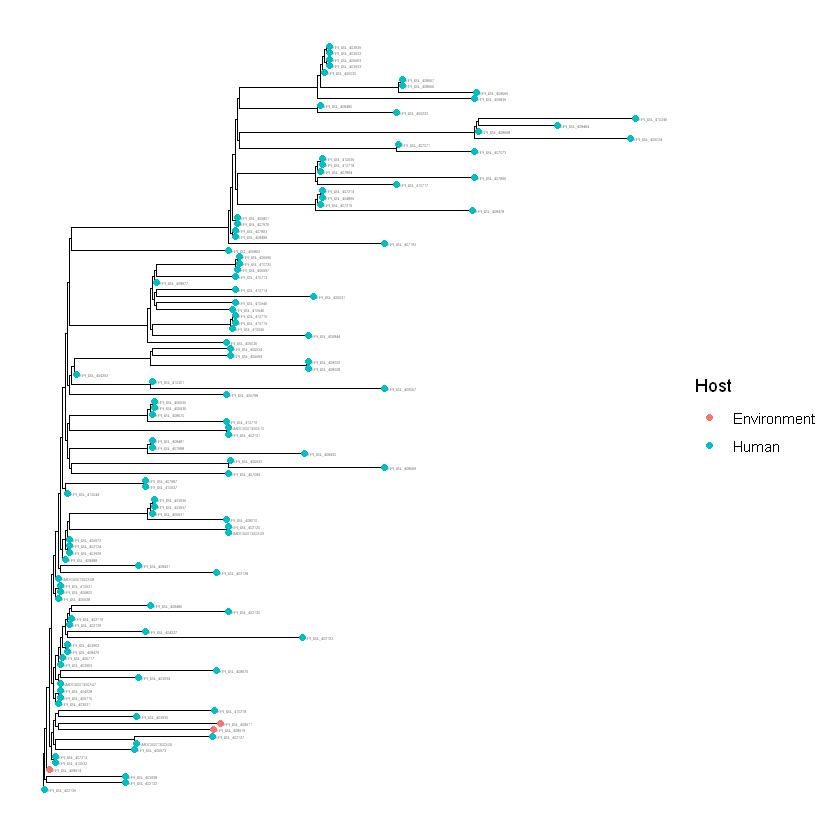

In [2]:
tree <- read.tree(file.path(genomeTreeDir, "RAxML_bestTree.GTRGAMMA"))
info <- read.csv(file.path(dataDir, "info.csv"))
p <- ggtree(tree)
p <- p %<+% info + 
    geom_tiplab(size = 0.75) + 
    geom_tippoint(aes(color=Host))
p

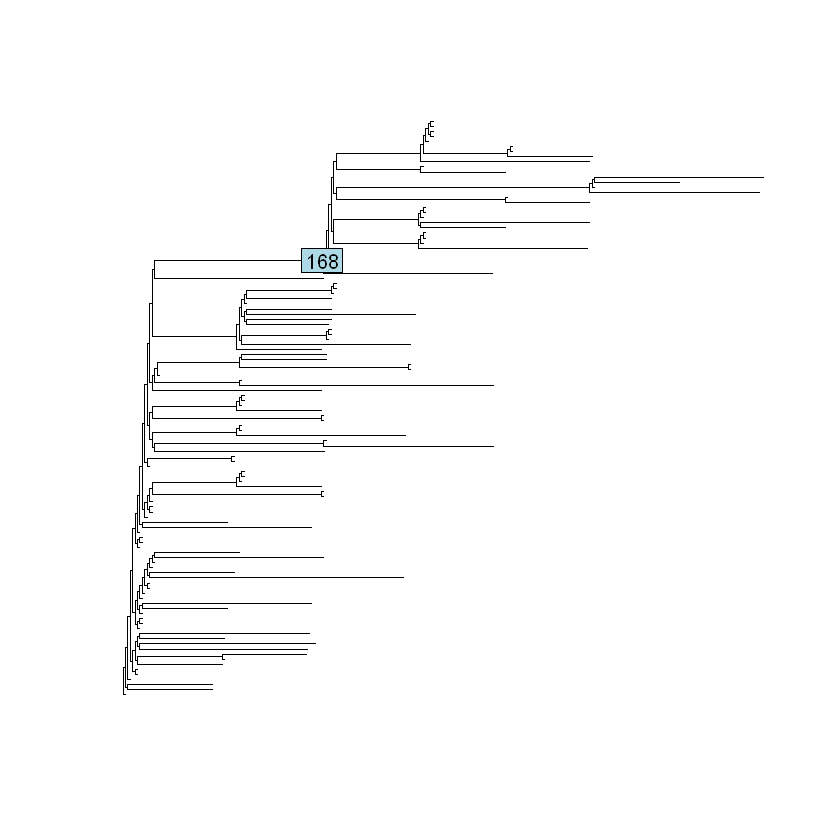

In [3]:
plot(ladderize(tree, FALSE), show.tip.label = FALSE)
nodelabels(node=168)

In [4]:
genotypes <- list()

genotypes[["G1"]] <- extract.clade(tree, 168)$tip.label

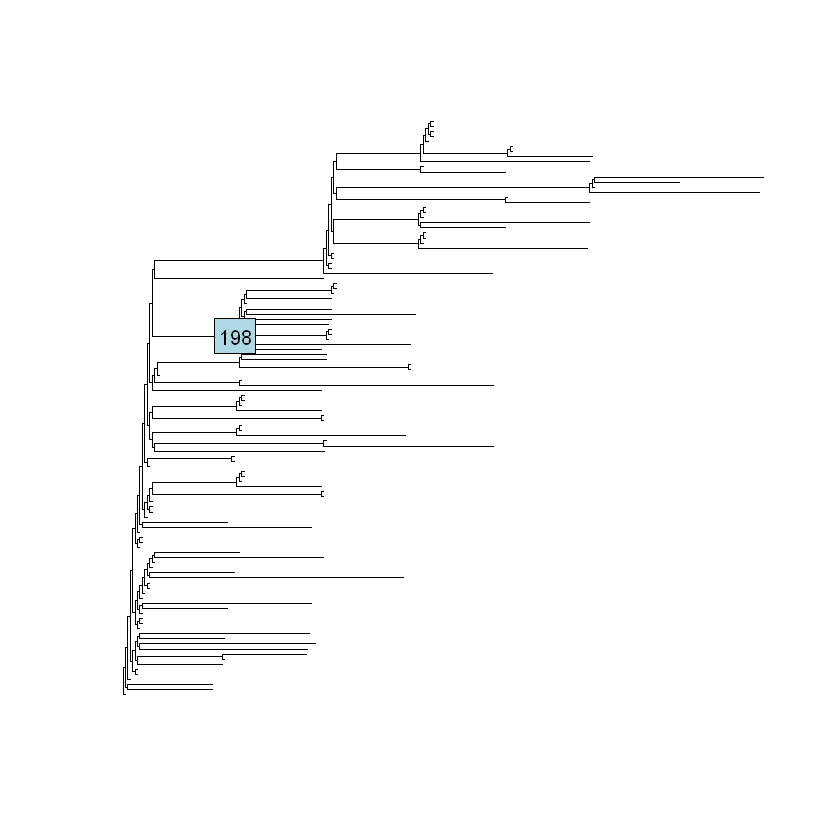

In [5]:
plot(ladderize(tree, FALSE), use.edge.length = TRUE, show.tip.label = FALSE)
nodelabels(node=198)

In [6]:
# genotypes[["gp2"]] <- setdiff(
#     extract.clade(tree, 198)$tip.label,
#     genotypes[["gp1"]]
# )

In [7]:
# plot(ladderize(tree, FALSE), use.edge.length = FALSE, show.tip.label = FALSE)
# nodelabels(node = 187)

In [8]:
# genotypes[["gp3"]] <- extract.clade(tree, 187)$tip.label

In [9]:
genotypes[["G2"]] <- setdiff(tree$tip.label, unlist(genotypes))

In [10]:
write_json(x = genotypes, path = file.path(dataDir, "genotypes.json"))

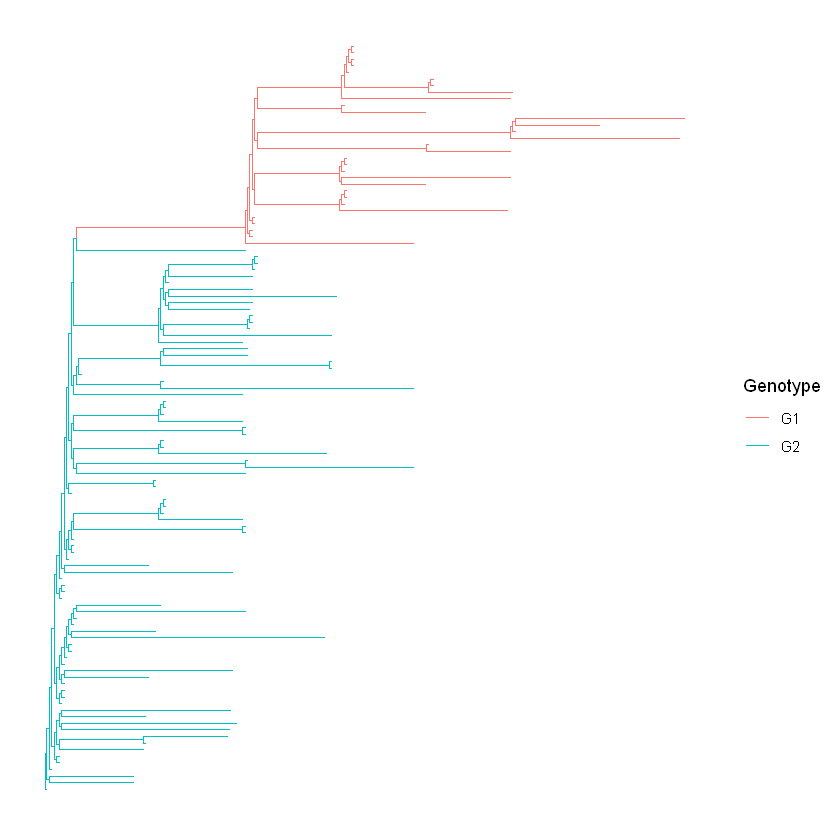

In [11]:
ggtree(groupOTU(tree, genotypes, "Genotype")) + aes(color=Genotype)

In [12]:
# pdf(file = "Figures/tree.pdf", p, width = 8, height = 15)
# plot(ladderize(tree, FALSE), show.tip.label = FALSE)
# tiplabels()
# invisible(dev.off())